In [1]:
# Loading all the required libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# storing the IPL Matches and Deliveries dataset into variables

matches = pd.read_csv(r'C:\Users\Chetan\Desktop\College\Python\IPL_EDA\matches.csv')
deliveries = pd.read_csv(r'C:\Users\Chetan\Desktop\College\Python\IPL_EDA\deliveries.csv')

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
#sns.set(rc={'figure.figsize':(9,8)})

In [5]:
list(matches['player_of_match'].value_counts()[0:10])

[21, 20, 17, 17, 17, 16, 15, 14, 13, 12]

<BarContainer object of 10 artists>

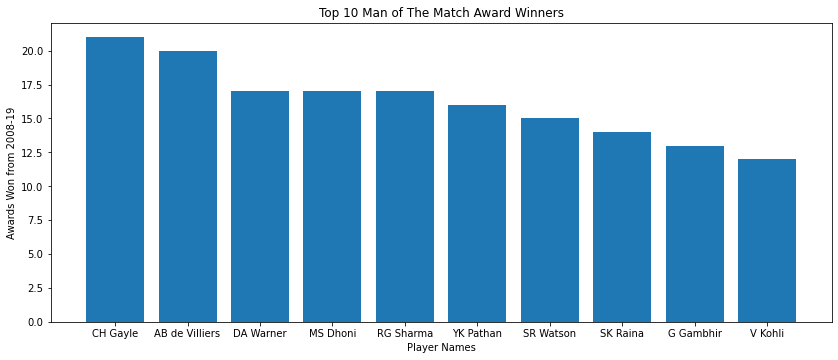

In [6]:
plt.figure(figsize=(14,5.5))
plt.title('Top 10 Man of The Match Award Winners')
plt.xlabel('Player Names')
plt.ylabel('Awards Won from 2008-19')
plt.bar(list(matches['player_of_match'].value_counts()[0:10].keys()), list(matches['player_of_match'].value_counts()[0:10]))

Text(0, 0.5, 'Awards Won from 2008-19')

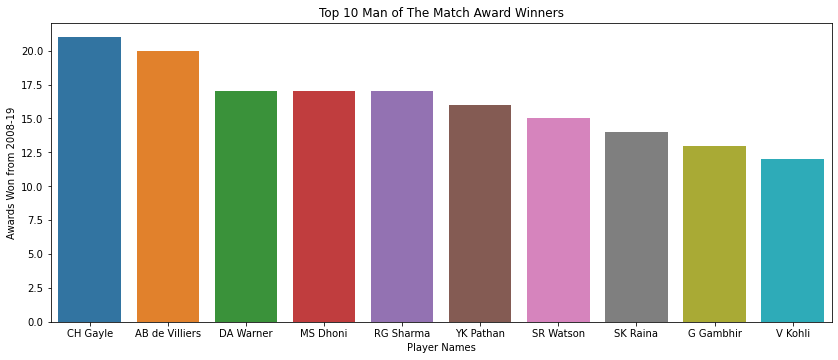

In [45]:
fig, ax = plt.subplots(figsize = (14,5.5))
sns.barplot(x = list(matches['player_of_match'].value_counts()[0:10].keys()), y = list(matches['player_of_match'].value_counts()[0:10]), ax = ax)
plt.title('Top 10 Man of The Match Award Winners')
plt.xlabel('Player Names')
plt.ylabel('Awards Won from 2008-19')


In [8]:
matches['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [9]:
matches['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [10]:
# Extracting record of instances where a team has won when choosing to bat first and viewing the first few elements of the table

batting_first = matches[matches['win_by_runs'] != 0]
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


Text(0, 0.5, 'Matches Played')

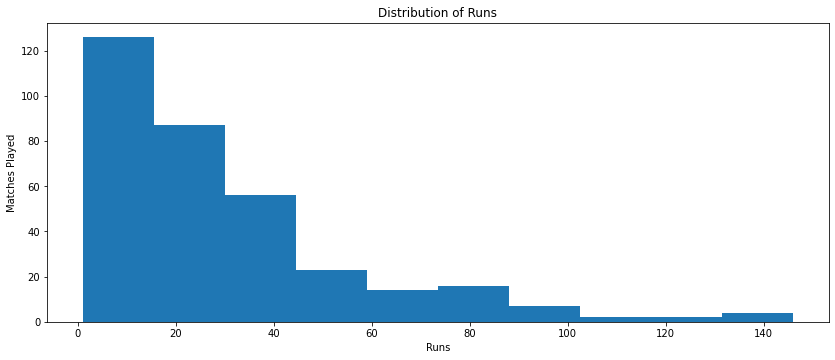

In [11]:
#  Plotting a Histogram to

plt.figure(figsize = (14, 5.5))
plt.hist(batting_first['win_by_runs'])
plt.title('Distribution of Runs')
plt.xlabel('Runs')
plt.ylabel('Matches Played')

In [12]:
batting_first['winner'].value_counts()[0:5]

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Name: winner, dtype: int64

Text(0, 0.5, 'Matches Won')

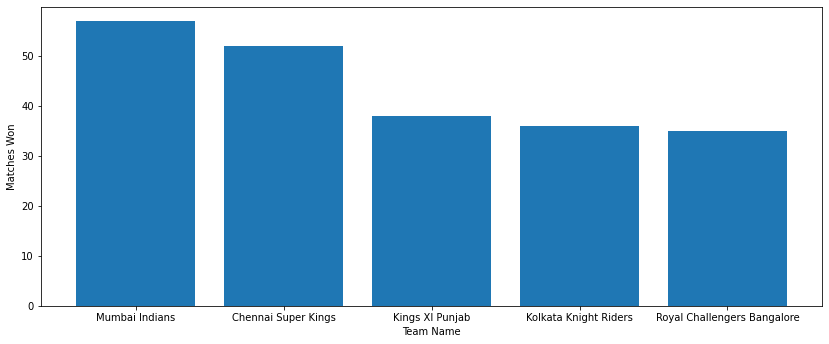

In [13]:
plt.figure(figsize = (14, 5.5))
plt.bar(list(batting_first['winner'].value_counts()[0:5].keys()), batting_first['winner'].value_counts()[0:5])
plt.xlabel('Team Name')
plt.ylabel('Matches Won')

<AxesSubplot:ylabel='winner'>

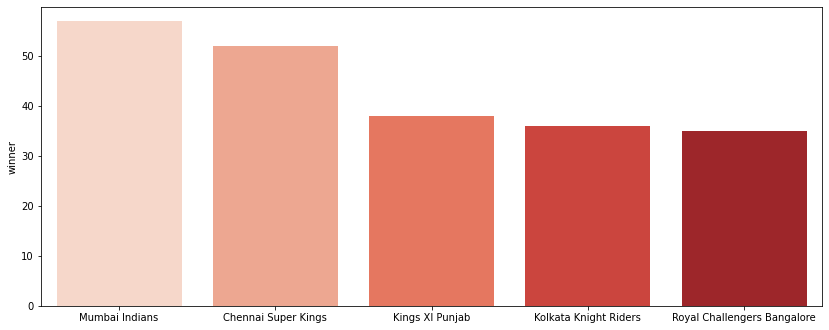

In [44]:
fig, ax = plt.subplots(figsize = (14,5.5))
sns.barplot(x = list(batting_first['winner'].value_counts()[0:5].keys()), y = batting_first['winner'].value_counts()[0:5], palette = 'Reds')

Text(0, 0.5, 'Matches Played')

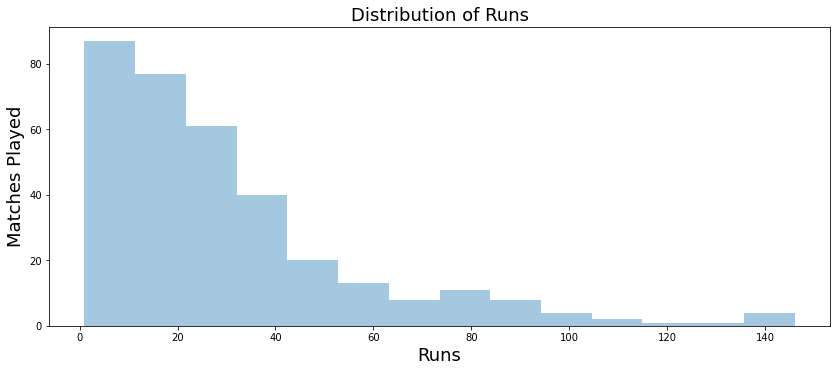

In [41]:
fig, ax = plt.subplots(figsize = (14,5.5))
sns.distplot(a = batting_first['win_by_runs'], hist = True, kde = False, bins = 14, ax = ax)
plt.title('Distribution of Runs', fontsize = 18)
plt.xlabel('Runs', fontsize = 18)
plt.ylabel('Matches Played', fontsize = 18)